# Benchmark

With this notebook 

## Setup phase

### Import libraries and queries


In [19]:
import os
import json
from whoosh.scoring import BM25F
from doc2vec.doc2vec_model import Doc2VecModel
from sentiment.sentiment_model import SentimentWeightingModel, AdvancedSentimentWeightingModel

import seaborn as sns
import pandas as pd

# file containing benchmark queries
file_path = os.path.join("evaluation", "queries.json")

# loades the queries
with open(file_path) as f:
    queries = json.load(f)

# Models that need to be tested. 
models = [
	(BM25F(), "BM25F"),
 	(Doc2VecModel(), "Doc2Vec"),
	(SentimentWeightingModel(), "Base Sentiment"),
	(AdvancedSentimentWeightingModel(), "Advanced Sentiment" ) 
]

### Showing all the available queries

In [20]:
indexes, uin = [i for i in range(len(queries))], [k["UIN"] for k in queries]
print('ID \t UIN')
print('\n'.join([f"{x[0]} \t {x[1]}" for x in list(zip(indexes, uin))]))

ID 	 UIN
0 	 I need an apartment near st james park
1 	 enjoyable double room where i could stay with my dog.
2 	 budget-friendly hostel in Kensington


### Query selection

In [24]:
try:
    # Selection occurs by this variable. 
    examined_q = 2
    print("User Information Need: " + queries[examined_q]["UIN"])
except IndexError as e:
    print(e)
    print("index not valid")

User Information Need: budget-friendly hostel in Kensington


In [25]:
from evaluation.functions import Benchmark

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # Suppress the warning 

b = Benchmark(queries[examined_q])


### Precision at standard Recall levels for query Q

Input: hostel AND neighbourhood_cleansed:("Kensington and Chelsea") AND price:[0 TO 100]
Parsed query: ((name:hostel OR description:hostel) AND neighbourhood_cleansed:"kensington chelsea" AND price:[0.0 TO 100.0])
Input: hostel AND neighbourhood_cleansed:("Kensington and Chelsea") AND price:[0 TO 100]
Parsed query: ((name:hostel OR description:hostel) AND neighbourhood_cleansed:"kensington chelsea" AND price:[0.0 TO 100.0])
Input: hostel AND neighbourhood_cleansed:("Kensington and Chelsea") AND price:[0 TO 100]
Parsed query: ((name:hostel OR description:hostel) AND neighbourhood_cleansed:"kensington chelsea" AND price:[0.0 TO 100.0])
Input: hostel AND neighbourhood_cleansed:("Kensington and Chelsea") AND price:[0 TO 100]
Parsed query: ((name:hostel OR description:hostel) AND neighbourhood_cleansed:"kensington chelsea" AND price:[0.0 TO 100.0])


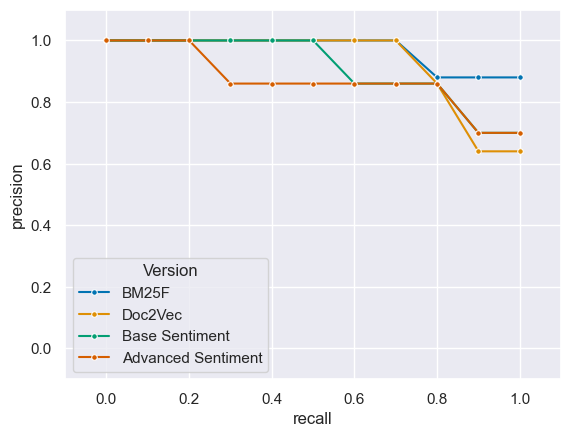

In [26]:
axes = ["recall", "precision"]
df = pd.DataFrame()

for model, model_name in models:
    result = b.getResults(20, model)
    SRLValues = b.getSRLValues(
        b.getPrecisionValues(result),
        b.getRecallValues(result)
    )
    #print(SRLValues)
    dfB = pd.DataFrame(SRLValues, columns = axes)
    dfB["Version"] = f'{model_name}'
    
    df = pd.concat([df, dfB])

sns.set_theme()

# create a dataframe for Seaborn

# plot the line graph
pltP = sns.lineplot(data = df, x = 'recall', y = 'precision', marker='o', markersize=4, 
            hue="Version", palette="colorblind")

# set fixed axes, the semicolon suppress the output
pltP.set_xlim([-0.1, 1.1]);
pltP.set_ylim([-0.1, 1.1]);
    

### Interpolated average precision at standard recall leveles

Input: hostel AND neighbourhood_cleansed:("Kensington and Chelsea") AND price:[0 TO 100]
Parsed query: ((name:hostel OR description:hostel) AND neighbourhood_cleansed:"kensington chelsea" AND price:[0.0 TO 100.0])
Input: hostel AND neighbourhood_cleansed:("Kensington and Chelsea") AND price:[0 TO 100]
Parsed query: ((name:hostel OR description:hostel) AND neighbourhood_cleansed:"kensington chelsea" AND price:[0.0 TO 100.0])
Input: hostel AND neighbourhood_cleansed:("Kensington and Chelsea") AND price:[0 TO 100]
Parsed query: ((name:hostel OR description:hostel) AND neighbourhood_cleansed:"kensington chelsea" AND price:[0.0 TO 100.0])
Input: hostel AND neighbourhood_cleansed:("Kensington and Chelsea") AND price:[0 TO 100]
Parsed query: ((name:hostel OR description:hostel) AND neighbourhood_cleansed:"kensington chelsea" AND price:[0.0 TO 100.0])
[0.97, 0.93, 0.91, 0.87]


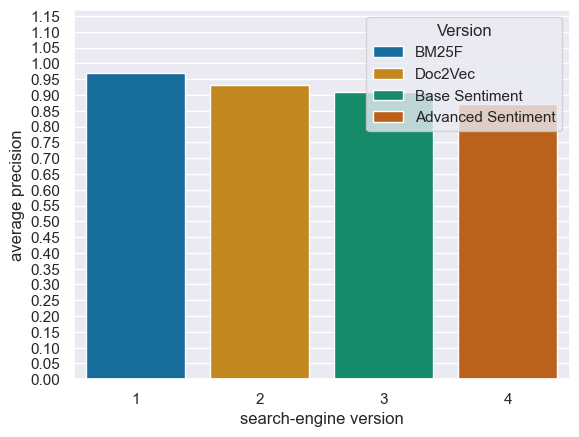

In [27]:
from matplotlib.ticker import MultipleLocator

columns = [] 
AvPr_values=[]

for model, model_name in models:
    result = b.getResults(20, model)
    SRLValues = b.getSRLValues(
        b.getPrecisionValues(result),
        b.getRecallValues(result)
    )
    
    AvPr_values.append(b.getIapAvgPrecision(SRLValues))
    
    columns.append(model_name)
    
# plot the average precisi+ons
# apply the default theme
sns.set_theme()

versions = [1, 2, 3, 4]

# create a dataframe for Seaborn
df = pd.DataFrame({"search-engine version": versions, "average precision": AvPr_values, "Version": columns})

print(AvPr_values)
# plot the bar graph
pltAvPr = sns.barplot(data = df, x = "search-engine version", y = 'average precision',palette="colorblind", hue="Version")

# set fixed axes, the semicolon suppress the output
pltAvPr.set_ylim([0.0, max(AvPr_values)+0.20]); # set y-axis    
pltAvPr.yaxis.set_major_locator(MultipleLocator(0.05))